In [76]:
from tensorflow.keras.models import model_from_json

In [77]:
json_file = open("emotion_model.json", "r")

In [78]:
loaded_model_json = json_file.read()

In [79]:
json_file.close()

In [80]:
emotion_model = model_from_json(loaded_model_json)

In [81]:
emotion_model.load_weights("emotion_model..weights.h5")

In [82]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4:"Neutral", 5: "Sad", 6: "Surprised"}

In [83]:
import numpy as np

In [84]:
import cv2

In [85]:
import matplotlib.pyplot as plt

In [86]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [87]:
img = cv2.imread("rainn-wilson-the-office2.jpg")

In [88]:
img = cv2.resize(img, (600,600))

In [89]:
img = cv2.convertScaleAbs(img, beta=50)

In [90]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

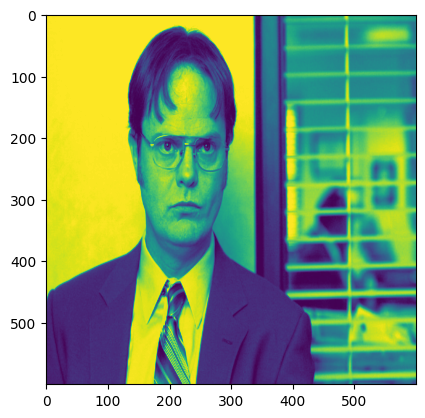

In [91]:
plt.imshow(gray_img)

In [92]:
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5)

In [93]:
faces

array([[132, 145, 194, 194]], dtype=int32)

In [94]:
if len(faces) == 0:
    print("No face detected!")

In [95]:
(x, y, w, h) = faces[0]

In [96]:
face_img = gray_img[y: y+h, x:x+w]

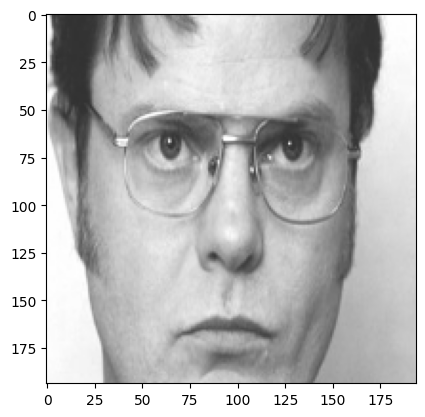

In [97]:
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))

In [98]:
resized_img = cv2.resize(face_img, (48,48))

In [99]:
img_pixels = resized_img.astype('float32') / 255.0

In [100]:
img_pixels = np.expand_dims(img_pixels, axis=-1)

In [101]:
img_pixels = np.expand_dims(img_pixels, axis=0)

In [102]:
predictions = emotion_model.predict(img_pixels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [103]:
predictions

array([[3.2934493e-01, 4.7010891e-03, 9.0880133e-02, 6.4279251e-05,
        1.7086214e-01, 1.2595883e-01, 2.7818862e-01]], dtype=float32)

In [104]:
max_index = np.argmax(predictions[0])

In [105]:
predicted_emotion = emotion_dict[max_index]

In [106]:
predicted_emotion

'Angry'